In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [54]:
iris = load_iris(as_frame=True)
df = iris.data.copy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
df['Flower_Name'] = ['setosa' if i == 0 else 'versicolor' if i == 1 else 'virginica' for i in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df['Flower_Name'].value_counts()

Flower_Name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [23]:
x = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['Flower_Name']
x.head(),y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    setosa
 1    setosa
 2    setosa
 3    setosa
 4    setosa
 Name: Flower_Name, dtype: object)

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
len(Y_test)

30

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
Y_pred = model.predict(X_test)

In [32]:
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
score = accuracy_score(Y_test,Y_pred)
print(f'Accuracy: {score*100}%')

Accuracy: 100.0%


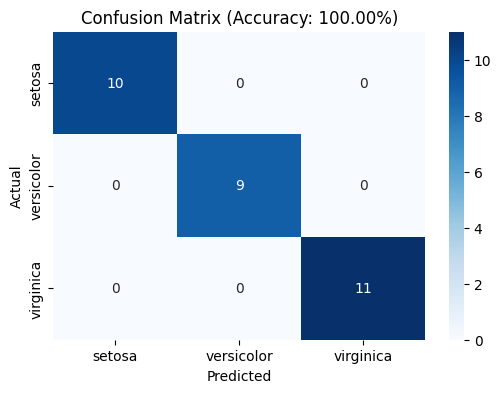

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Accuracy: {acc*100:.2f}%)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()